In [1]:
import seaborn as sns
import pandas as pd

# Load dataset
df = sns.load_dataset("tips")

# Preview
print(df.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = sns.load_dataset("tips")
print(df.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [3]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000
total_bill    0
tip           0
sex           0
smoker        0
day     

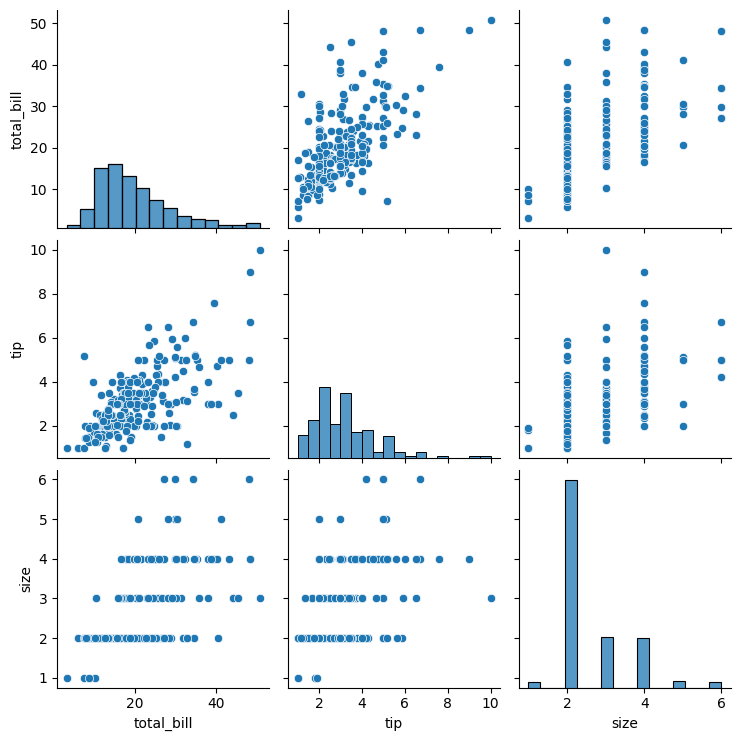

In [4]:
sns.pairplot(df)
plt.show()


In [5]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [6]:
X = df_encoded.drop("tip", axis=1)
y = df_encoded["tip"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.7033566017436105
R² Score: 0.43730181943482505


In [10]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print(coeff_df.sort_values(by="Coefficient", ascending=False))


       Feature  Coefficient
1         size     0.233484
3    smoker_No     0.192353
4      day_Fri     0.179721
6      day_Sun     0.128928
0   total_bill     0.094700
5      day_Sat    -0.006064
2   sex_Female    -0.028819
7  time_Dinner    -0.094957
